In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings("ignore")

# Extracting The Data

In [2]:
df = pd.read_csv("C:/Users/Assem/Downloads/archive (1)/vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Assesing The Data

In [9]:
# Display basic information about the dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:

# Display summary statistics
print(df.describe())


                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.

In [11]:

# Check for missing values
print(df.isnull().sum())


id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [12]:

# Check for duplicates
print(df.duplicated().sum())


0


In [13]:

# Display the number of unique values in each column
print(df.nunique())


id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64


In [14]:

# Display the column names
print(df.columns)


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [15]:

# Check for inconsistent data types
print(df.dtypes)


id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object


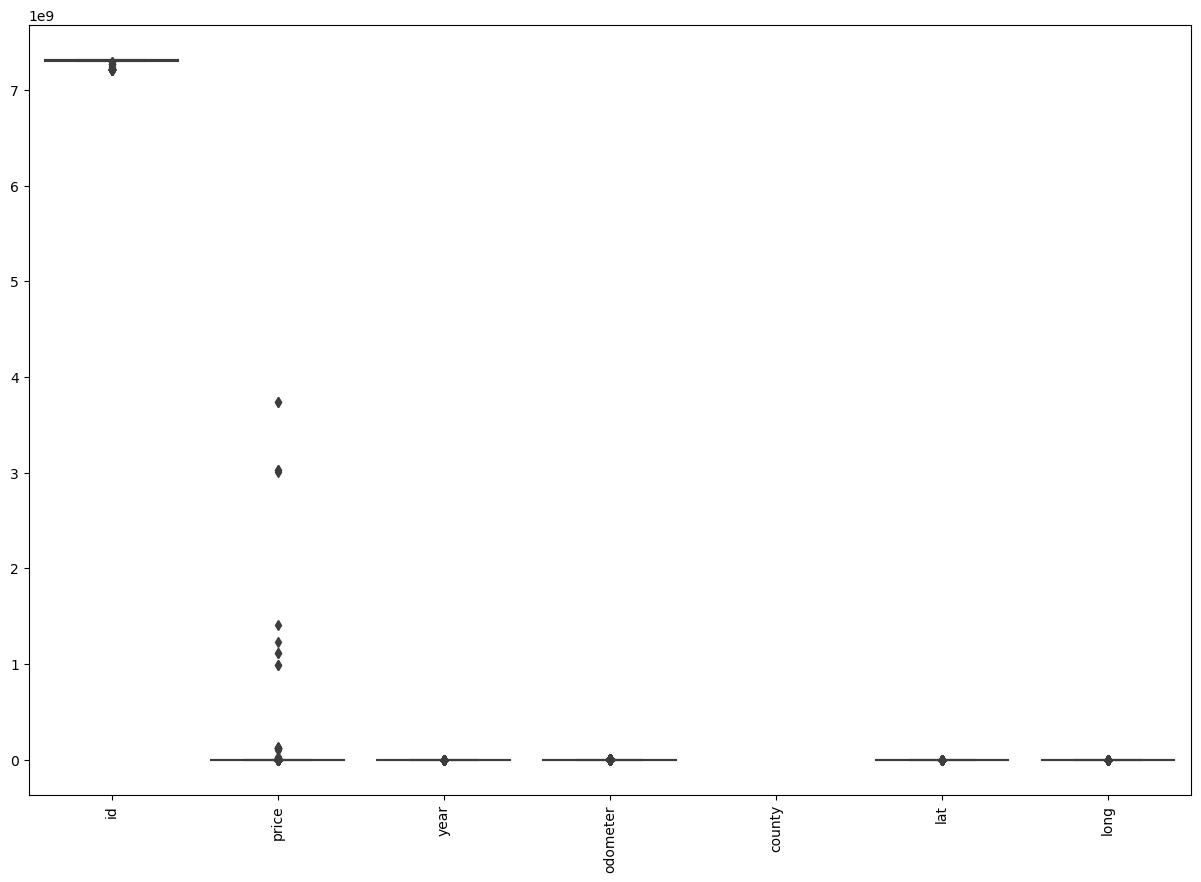

In [17]:

# Check for outliers in numerical columns

plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()


# Cleaning The Data

In [18]:
# Drop rows with missing target values
df.dropna(subset=['price'], inplace=True)

In [19]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [20]:
# Remove unnecessary whitespace and special characters from columns
df['model'] = df['model'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [21]:
# Standardize string data
df['manufacturer'] = df['manufacturer'].str.strip().str.lower()
df['model'] = df['model'].str.strip().str.lower()

In [22]:
# Remove outliers based on the price
df = df[(df['price'] > 100) & (df['price'] < 100000)]

In [23]:
# Fill missing values with appropriate methods
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [24]:
# Remove any irrelevant columns
df.drop(columns=['url', 'region_url', 'image_url'], inplace=True)

In [25]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,2018.0,NaN,NaN,NaN,NaN,NaN,87268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,2018.0,NaN,NaN,NaN,NaN,NaN,87268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,2018.0,NaN,NaN,NaN,NaN,NaN,87268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,2018.0,NaN,NaN,NaN,NaN,NaN,87268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,2018.0,NaN,NaN,NaN,NaN,NaN,87268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [26]:
# Fill missing values with appropriate methods
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing values with the most frequent value
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the median value
        df[column].fillna(df[column].median(), inplace=True)

In [27]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,NaN,az,39.26,-88.098659,2021-04-23T22:13:05-0400
1,7218891961,fayetteville,11900,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,NaN,ar,39.26,-88.098659,2021-04-23T22:13:05-0400
2,7221797935,florida keys,21000,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,NaN,fl,39.26,-88.098659,2021-04-23T22:13:05-0400
3,7222270760,worcester / central MA,1500,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,NaN,ma,39.26,-88.098659,2021-04-23T22:13:05-0400
4,7210384030,greensboro,4900,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,NaN,nc,39.26,-88.098659,2021-04-23T22:13:05-0400


In [28]:
# Check for missing values
print(df.isnull().sum())

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
description          0
county          389794
state                0
lat                  0
long                 0
posting_date         0
dtype: int64


In [29]:
df['county'].fillna('unknown', inplace=True)

In [30]:
# Check for missing values
print(df.isnull().sum())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
description     0
county          0
state           0
lat             0
long            0
posting_date    0
dtype: int64


In [31]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,unknown,az,39.26,-88.098659,2021-04-23T22:13:05-0400
1,7218891961,fayetteville,11900,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,unknown,ar,39.26,-88.098659,2021-04-23T22:13:05-0400
2,7221797935,florida keys,21000,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,unknown,fl,39.26,-88.098659,2021-04-23T22:13:05-0400
3,7222270760,worcester / central MA,1500,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,unknown,ma,39.26,-88.098659,2021-04-23T22:13:05-0400
4,7210384030,greensboro,4900,2018.0,ford,f150,good,6 cylinders,gas,87268.0,...,4wd,full-size,sedan,white,Call or text today to find out more. (602) 620...,unknown,nc,39.26,-88.098659,2021-04-23T22:13:05-0400


# Now The Data Is Ready For The Next Step:

In [ ]:
'''

Business Questions:

1. What are the most common car manufacturers in the dataset?
2. What is the average price of vehicles by manufacturer?
3. What is the distribution of vehicle prices?
4. What is the average mileage of vehicles by manufacturer?
5. How does the price of vehicles vary with the year of manufacture?
6. What are the top 10 most common car models?
7. What is the average price of vehicles by state?
8. What is the correlation between vehicle price and mileage?
9. How does the condition of the car affect its price?
10. What is the distribution of vehicle types?
11. How does the price vary by fuel type?
12. What are the most common colors of vehicles in the dataset?

'''

In [32]:
# 1. Most common car manufacturers
print(df['manufacturer'].value_counts().head(10))

manufacturer
ford         80072
chevrolet    50094
toyota       31342
honda        19741
nissan       17227
jeep         17199
ram          16327
gmc          15351
bmw          13578
dodge        12145
Name: count, dtype: int64


In [33]:
# 2. Average price of vehicles by manufacturer
print(df.groupby('manufacturer')['price'].mean().sort_values(ascending=False))

manufacturer
ferrari            72810.526316
aston-martin       46560.555556
tesla              39336.128419
porsche            30552.692675
ram                29963.197097
alfa-romeo         29553.809802
rover              28413.441598
jaguar             27089.493369
gmc                25045.361279
audi               24673.175233
mercedes-benz      21761.056382
infiniti           21175.802299
acura              20830.880473
ford               20689.666712
bmw                20538.788408
lexus              20485.248535
lincoln            20442.116754
cadillac           20308.430736
chevrolet          19969.676049
jeep               19879.933833
volvo              18377.787703
toyota             17204.524568
datsun             16176.084746
dodge              15895.912474
buick              15274.373981
land rover         15103.000000
mini               14976.425011
mitsubishi         14646.126902
subaru             13871.840570
harley-davidson    13448.246377
mazda              13378.06

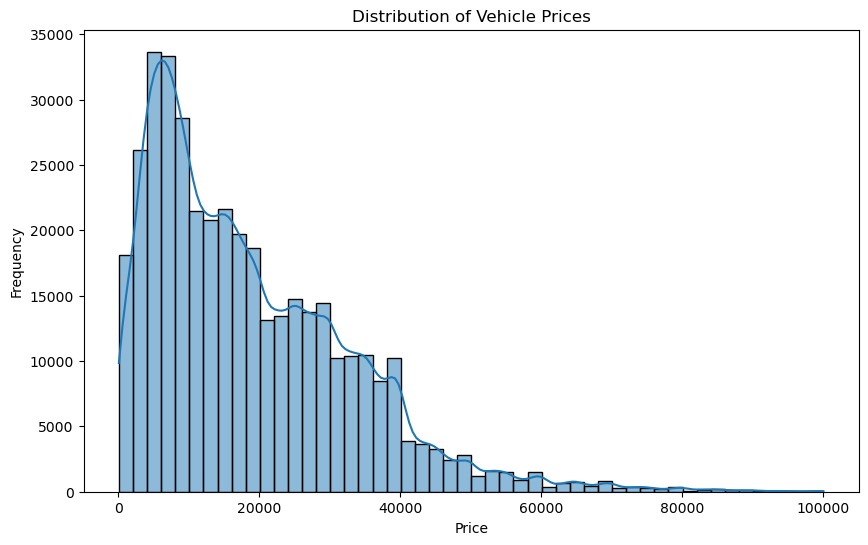

In [34]:
# 3. Distribution of vehicle prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [35]:
# 4. Average mileage of vehicles by manufacturer
print(df.groupby('manufacturer')['odometer'].mean().sort_values(ascending=False))

manufacturer
pontiac            135783.193592
land rover         125886.727273
saturn             124960.786717
mercury            122213.186891
honda              117270.646016
ford               112517.878709
toyota             108773.295993
volvo              108203.082594
chevrolet          105682.776640
gmc                104720.999088
chrysler           102134.083541
subaru              98604.730169
ram                 98375.630673
nissan              93098.437801
dodge               92535.569205
lexus               91477.641787
mazda               90631.133786
buick               89707.664466
jeep                88152.431827
hyundai             87313.296671
porsche             85481.550159
volkswagen          85067.851073
mercedes-benz       82809.941366
cadillac            79878.763202
kia                 78695.102637
acura               77768.000530
datsun              77153.728814
bmw                 76093.794079
rover               75576.688012
lincoln             73504.0109

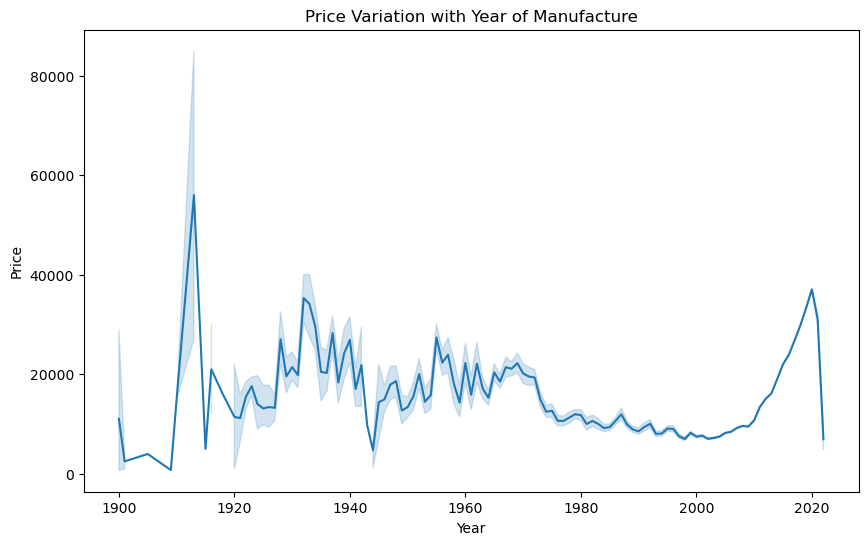

In [36]:
# 5. Price variation with year of manufacture
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df)
plt.title('Price Variation with Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [37]:
# 6. Top 10 most common car models
print(df['model'].value_counts().head(10))

model
f150             12678
silverado1500     4490
1500              3746
camry             2786
silverado         2745
accord            2718
civic             2561
wrangler          2539
escape            2505
altima            2458
Name: count, dtype: int64


In [38]:
# 7. Average price of vehicles by state
print(df.groupby('state')['price'].mean().sort_values(ascending=False))

state
wv    25022.481407
ut    24924.522401
wa    24563.652195
mt    24415.515459
ak    23936.805556
mo    22671.456903
wy    22287.561189
ar    22183.533271
nm    21801.027198
id    21616.434236
hi    21298.859098
ok    21298.709701
al    21129.077186
tx    21119.621604
sc    21032.139667
nv    21019.555848
la    20581.158106
az    20346.251894
ga    20231.770850
tn    20200.562141
ks    19690.425945
in    19625.613545
nc    19550.657258
ky    19482.854922
nd    19247.138817
co    19224.375868
sd    19210.879968
ne    18946.806102
md    18832.152531
fl    18817.364101
or    18619.452011
ca    18434.858825
ny    18231.825867
vt    17733.589240
ms    17255.899586
il    17236.890311
ia    17127.953995
va    16960.582110
nh    16827.620015
wi    16762.977156
mn    16743.772777
ri    16721.423602
de    16409.052036
pa    16249.749473
me    16208.105718
ma    16161.265125
oh    16103.096755
dc    15921.584024
mi    15778.695764
nj    15585.791424
ct    15059.887408
Name: price, dtype: float

In [39]:
# 8. Correlation between vehicle price and mileage
print(df[['price', 'odometer']].corr())

             price  odometer
price     1.000000 -0.179328
odometer -0.179328  1.000000


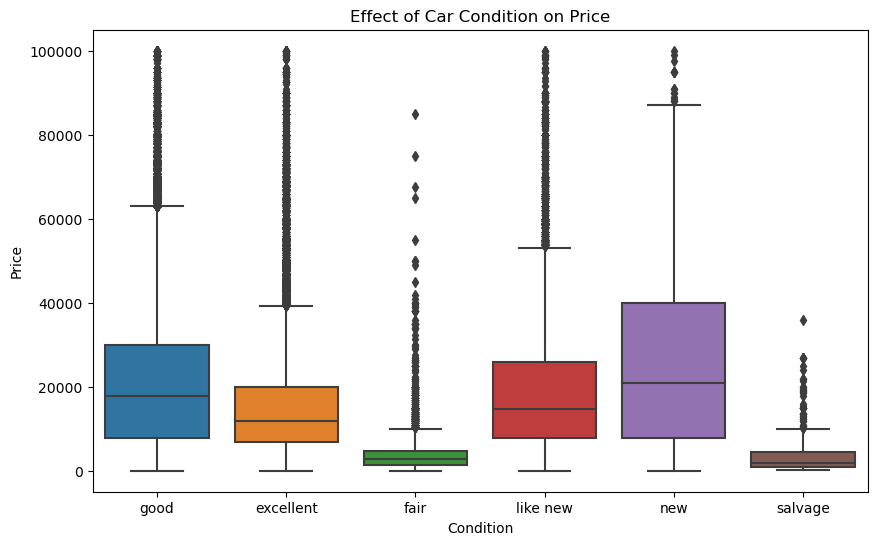

In [40]:
# 9. Effect of car condition on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Effect of Car Condition on Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

In [41]:
# 10. Distribution of vehicle types
print(df['type'].value_counts())

type
sedan          163669
SUV             70274
pickup          41292
truck           30361
other           19749
coupe           17876
hatchback       15836
wagon            9898
van              7910
convertible      7307
mini-van         4538
offroad           587
bus               497
Name: count, dtype: int64


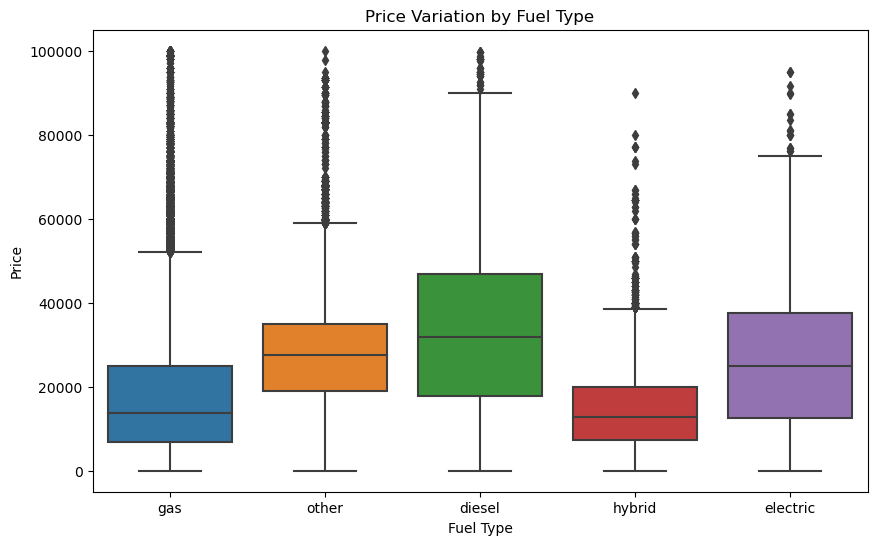

In [42]:
# 11. Price variation by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price Variation by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [43]:
# 12. Most common colors of vehicles
print(df['paint_color'].value_counts().head(10))

paint_color
white     187509
black      58133
silver     39774
blue       29221
red        28634
grey       22606
green       6978
custom      6253
brown       6169
yellow      2007
Name: count, dtype: int64


# EDA

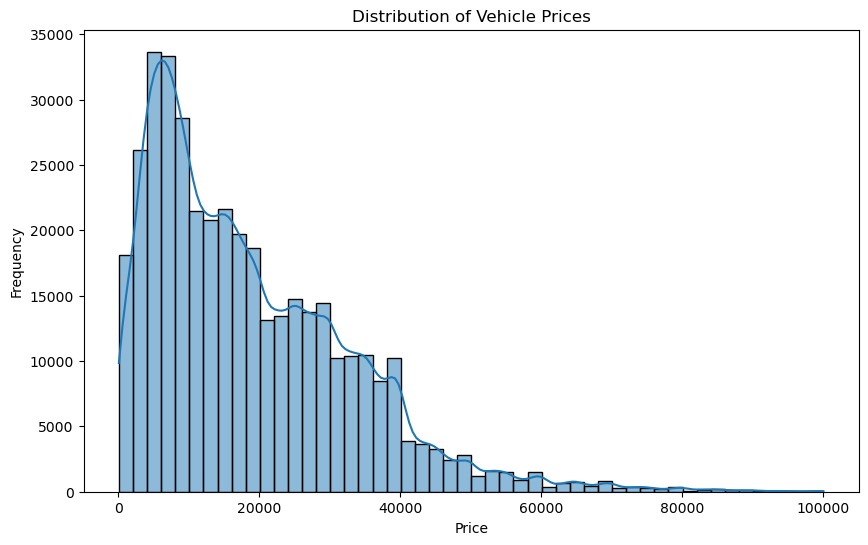

In [45]:
# Univariate Analysis

# 1. Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

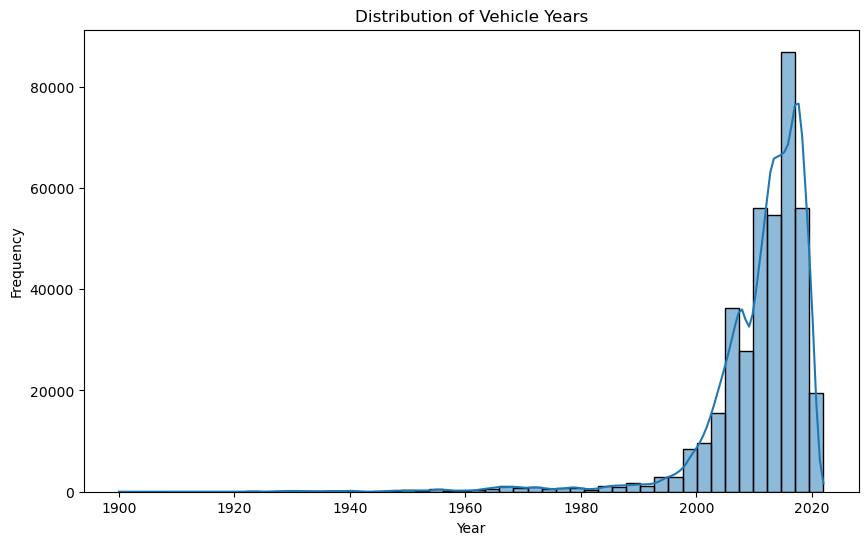

In [46]:
# 2. Distribution of vehicle years
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribution of Vehicle Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

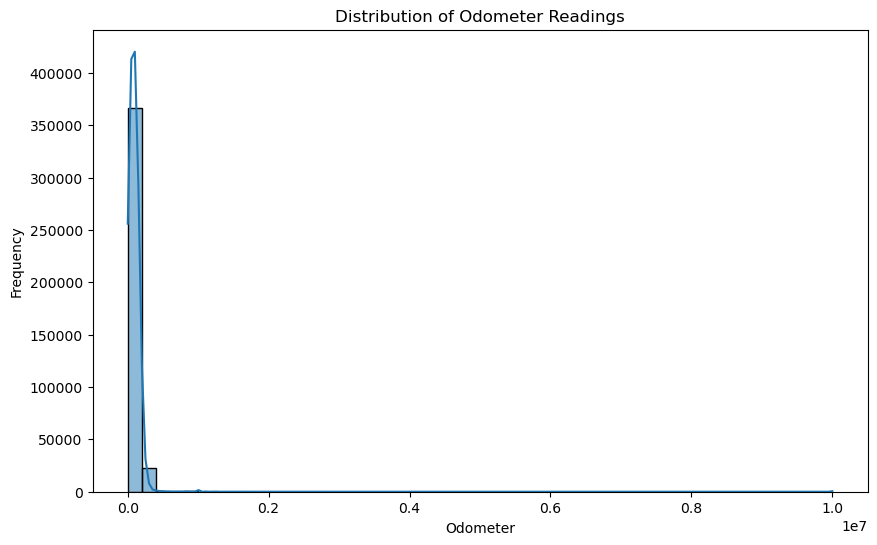

In [47]:
# 3. Distribution of odometer readings
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

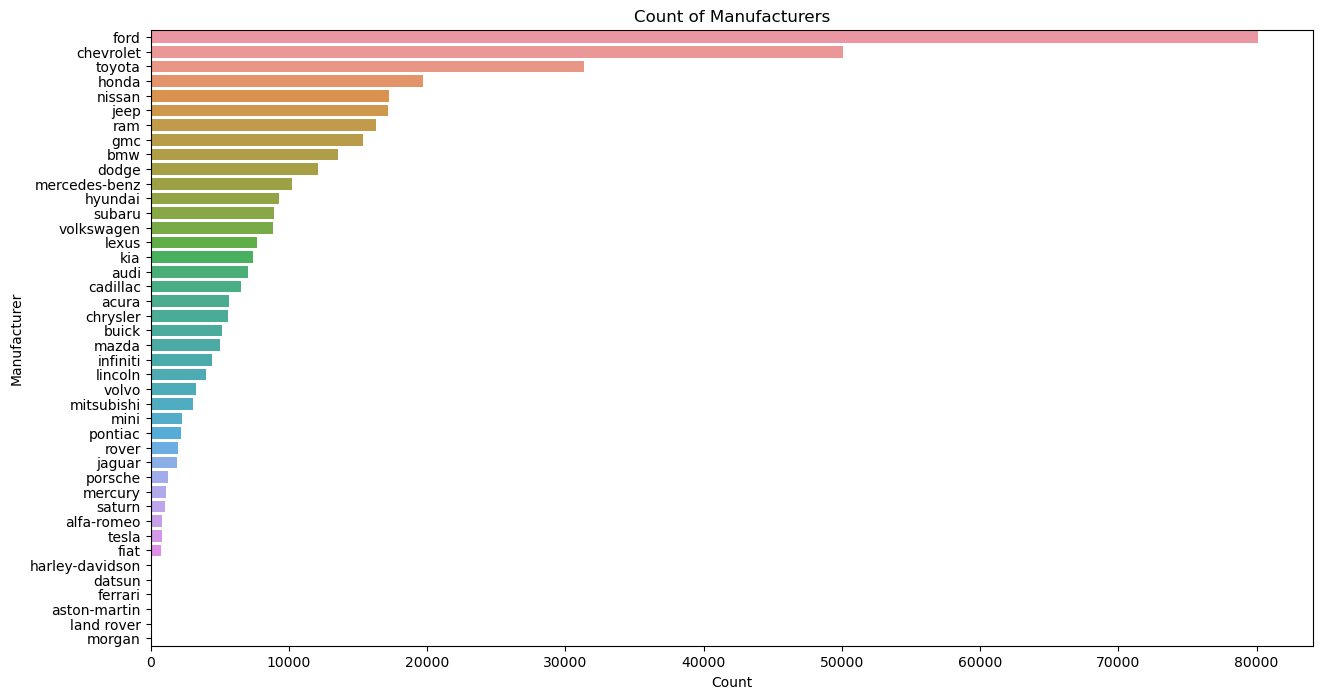

In [48]:
# 4. Count of manufacturers
plt.figure(figsize=(15, 8))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index)
plt.title('Count of Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

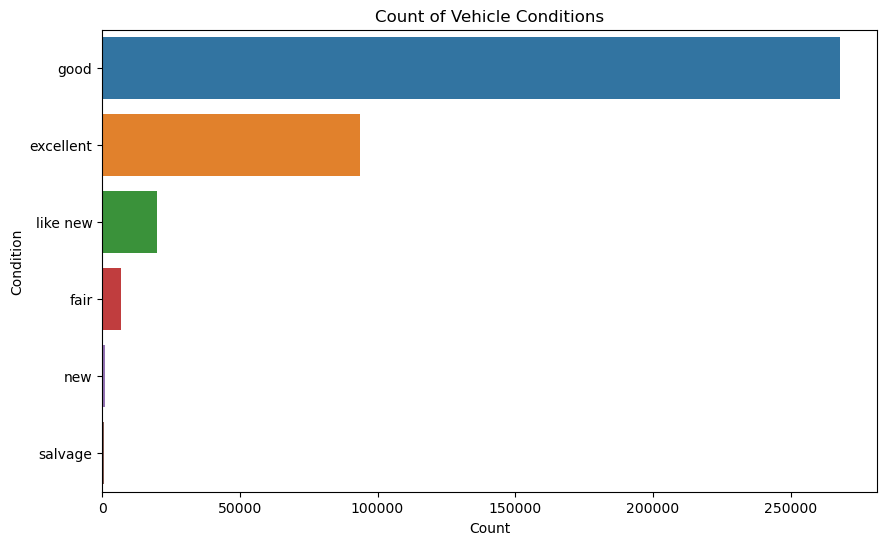

In [49]:
# 5. Count of vehicle conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='condition', data=df, order=df['condition'].value_counts().index)
plt.title('Count of Vehicle Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

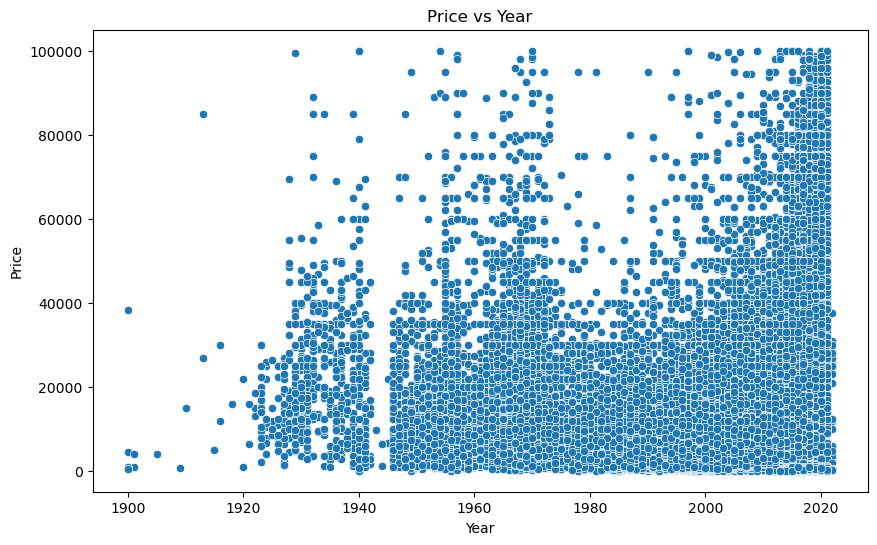

In [50]:
# Bivariate Analysis

# 1. Price vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

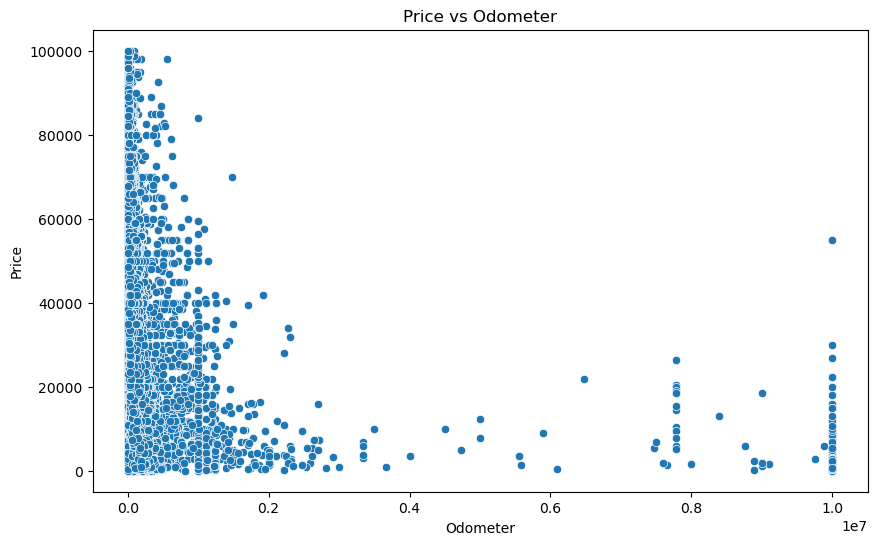

In [51]:
# 2. Price vs Odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

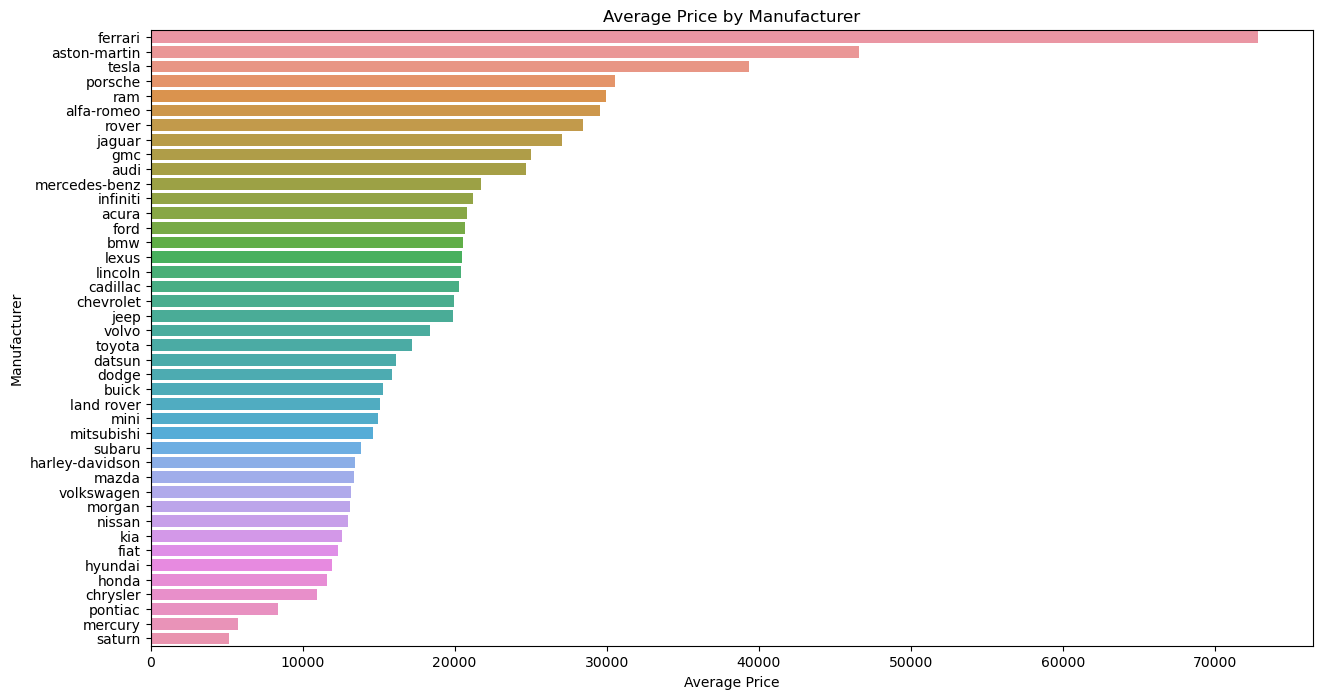

In [52]:
# 3. Average price by manufacturer
plt.figure(figsize=(15, 8))
sns.barplot(x='price', y='manufacturer', data=df, estimator='mean', ci=None, order=df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).index)
plt.title('Average Price by Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()

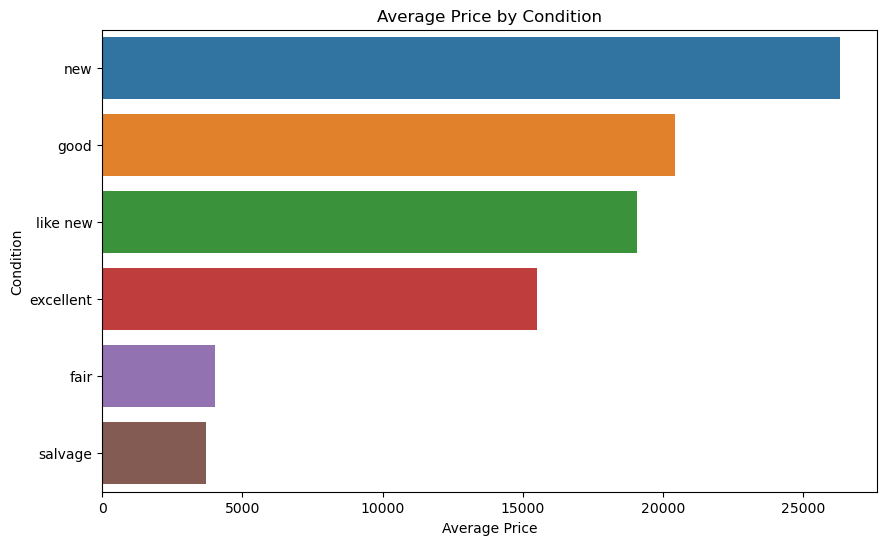

In [53]:
# 4. Average price by condition
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='condition', data=df, estimator='mean', ci=None, order=df.groupby('condition')['price'].mean().sort_values(ascending=False).index)
plt.title('Average Price by Condition')
plt.xlabel('Average Price')
plt.ylabel('Condition')
plt.show()

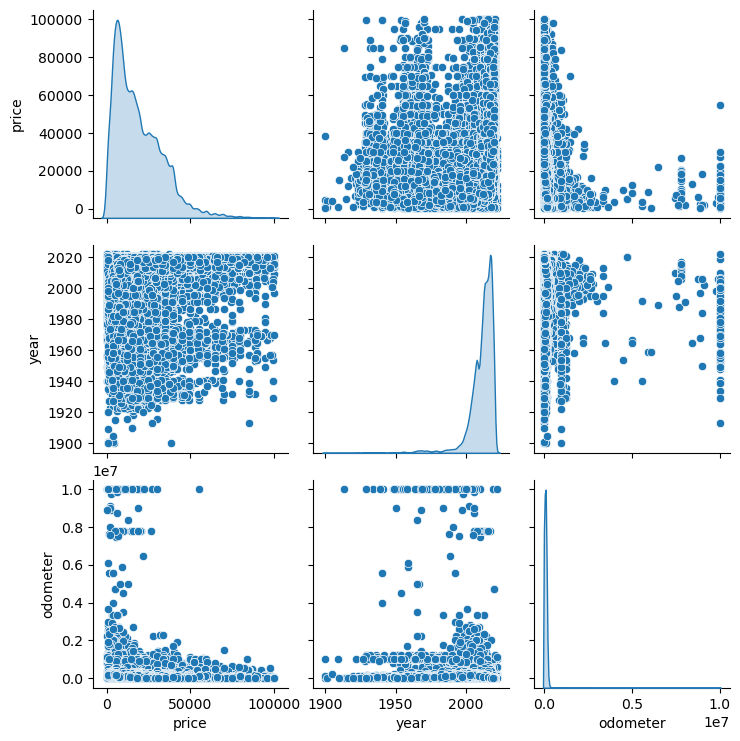

In [55]:
# Multivariate Analysis

# 1. Pairplot of numerical features
sns.pairplot(df[['price', 'year', 'odometer']], diag_kind='kde')
plt.show()

In [ ]:
'''

Explanation of EDA Steps
Understand the data structure and content:

Load the data and display basic information, including the first few rows.
Check for missing values and duplicates.
Univariate analysis:

Plot distributions of individual features such as price, year, and odometer.
Count the occurrences of categorical variables like manufacturer and condition.
Bivariate analysis:

Explore relationships between two variables, e.g., price vs. year and price vs. odometer.
Plot the average price by manufacturer and condition.
Display the correlation matrix for numerical features.
Multivariate analysis:

Create pair plots to observe interactions between multiple numerical variables.

'''